In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import plotly.express as px
%matplotlib inline

# Reading data

In [2]:
df = pd.read_csv("house_price.csv")
df.describe()
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [3]:
df_new = df
df_new.shape

(3479, 8)

# 

# Remove comma from Area datas

In [4]:
df_new['Area'] = df_new['Area'].str.replace(',', '')

## Convert Area Column String to Float

In [5]:
df_new['Area'] = df_new['Area'].astype(float)

# 

# Finding Area outliers by Z score

In [6]:
#from scipy import stats

#z = np.abs(stats.zscore(df_new['Area']))

#print(z)

#threshold = 3

#print(np.where(z > threshold))

# 

# Finding Area outliers which are >= 1000

In [7]:
index_noise = df_new[(df_new['Area'] >= 1000)].index
print(index_noise)

Int64Index([570, 709, 807, 1604, 2171, 2802], dtype='int64')


## Removing Area outliers

In [8]:
df_new = df_new.drop(df_new.index[index_noise]) #,inplace = True

# 

# Find & Remove null Address

In [9]:
df_new = df_new.dropna() #subset='Address'

In [10]:
print(df_new['Address'].to_string())

0                             Shahran
1                             Shahran
2                              Pardis
3                       Shahrake Qods
4                      Shahrake Gharb
5          North Program Organization
6                              Pardis
7                             Shahran
8                            Andisheh
9              West Ferdows Boulevard
10             West Ferdows Boulevard
11                             Narmak
12                             Narmak
13                        Saadat Abad
14                              Zafar
15                         Islamshahr
16                             Narmak
17                            Pirouzi
18             West Ferdows Boulevard
19                            Pirouzi
20                     Shahrake Gharb
21            Shahrake Shahid Bagheri
22                            Shahran
23                          Moniriyeh
24                        Saadat Abad
25                           Velenjak
26          

In [11]:
df_new.shape

(3450, 8)

# 

# Plot some features

### Address vs Price

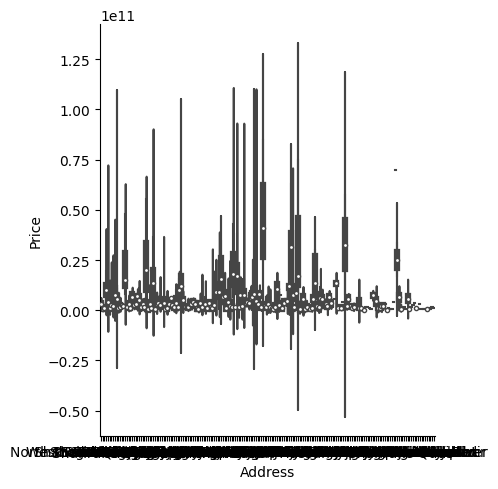

In [12]:
import seaborn as sns
sns.catplot(data=df_new, x="Address", y="Price" , kind="violin")

### Area vs Price

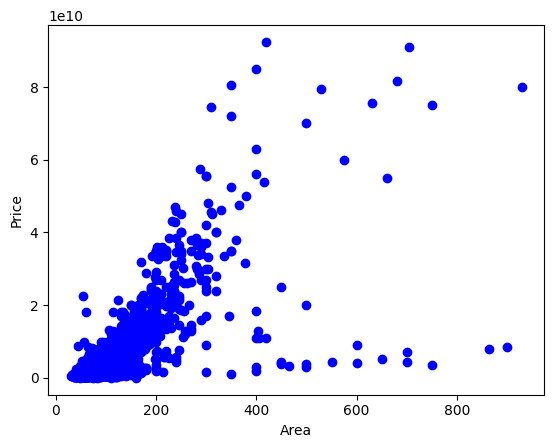

In [13]:
plt.scatter(df_new.Area, df_new.Price,  color='blue')
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

### Room vs Price

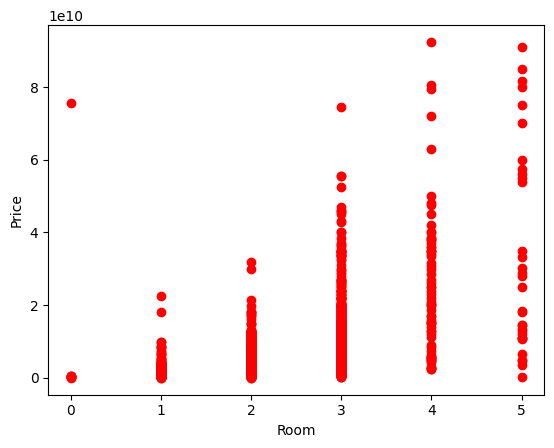

In [14]:
plt.scatter(df_new.Room, df_new.Price,  color='red')
plt.xlabel("Room")
plt.ylabel("Price")
plt.show()

### Parking vs Price

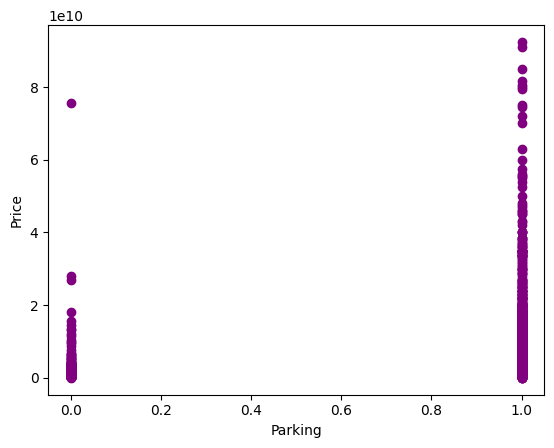

In [15]:
plt.scatter(df_new.Parking, df_new.Price,  color='purple')
plt.xlabel("Parking")
plt.ylabel("Price")
plt.show()

### Warehouse vs Price

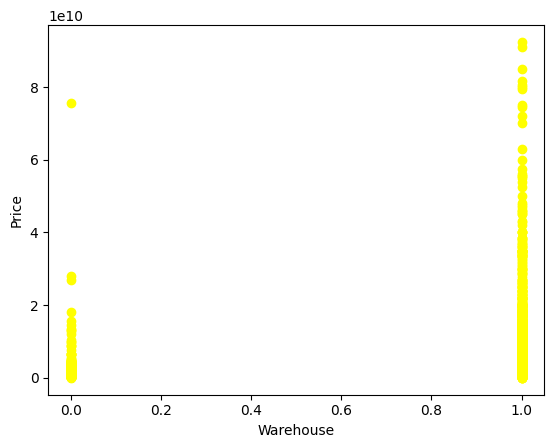

In [16]:
plt.scatter(df_new.Warehouse, df_new.Price,  color='yellow')
plt.xlabel("Warehouse")
plt.ylabel("Price")
plt.show()

### Elevator vs Price

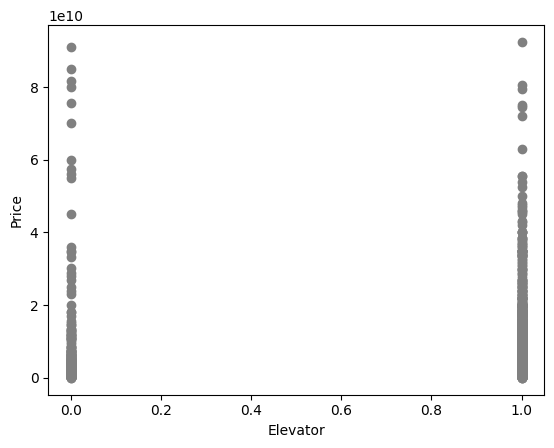

In [17]:
plt.scatter(df_new.Elevator, df_new.Price,  color='gray')
plt.xlabel("Elevator")
plt.ylabel("Price")
plt.show()

# Result : 
### Area has no relation with Price

# 

# Convert Parking, Warehous, Elevator & Address to Number

In [18]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [19]:
encode_address = LabelEncoder()
df_new['Parking'] = encode_address.fit_transform(df_new['Parking'])
df_new['Warehouse'] = encode_address.fit_transform(df_new['Warehouse'])
df_new['Elevator'] = encode_address.fit_transform(df_new['Elevator'])

#aded!
df_new['Address'] = encode_address.fit_transform(df_new['Address'])


In [20]:
# normalize the Address column
df_new['Address'] =( df_new['Address']) / max(df_new['Address'])

# 

# Create X and y lists

In [21]:
X = df_new[['Room', 'Parking', 'Warehouse', 'Elevator', 'Address']] 

Y = df_new['Price(USD)']

# 

# Train test split

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.15, random_state=1)

print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)


Train set: (2932, 5) (2932,)
Test set: (518, 5) (518,)


# 

# Multiple LinearRegression Model

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

regr = LinearRegression()

#x = np.asanyarray(X)
#y = np.asanyarray(y)

regr.fit (X_train, Y_train)

# The coefficients
print ('Coefficients: ', regr.coef_)


Coefficients:  [193136.6840148   30168.96270693  22437.7007678   -9278.39517784
 -36726.40204873]


## Prediction & R2_score

In [24]:
from sklearn.metrics import r2_score

y_hat= regr.predict(X_test)

#x = np.asanyarray(X_test)
#y = np.asanyarray(Y_test)

print(y_hat[:2], Y_test[:2])

print("R2-score: %.2f" % r2_score(Y_test , y_hat) )

[132892.55400097 157060.81821609] 1411    77666.67
2573    76666.67
Name: Price(USD), dtype: float64
R2-score: 0.37


# 

# PolynomialRegression model: degree = 2

In [25]:
from sklearn.preprocessing import PolynomialFeatures

poly_model = PolynomialFeatures(2)

# transform out polynomial features
poly_X_train = poly_model.fit_transform(X_train)
poly_X_test = poly_model.fit_transform(X_test) # aded!


poly_X_train

array([[1.        , 2.        , 0.        , ..., 0.        , 0.        ,
        0.36251747],
       [1.        , 2.        , 1.        , ..., 0.        , 0.        ,
        0.9179847 ],
       [1.        , 2.        , 1.        , ..., 1.        , 0.61780105,
        0.38167813],
       ...,
       [1.        , 2.        , 1.        , ..., 0.        , 0.        ,
        0.4079932 ],
       [1.        , 3.        , 1.        , ..., 1.        , 0.2617801 ,
        0.06852882],
       [1.        , 2.        , 1.        , ..., 1.        , 0.85340314,
        0.72829692]])

## Prediction & R2_score

In [26]:
from sklearn.linear_model import LinearRegression

# fit the model

regression_model = LinearRegression()

regression_model.fit(poly_X_train, Y_train)

y_pred = regression_model.predict(poly_X_test)


print('Coefficients:', regression_model.coef_)


Coefficients: [ 0.00000000e+00 -3.78368107e+05 -1.23981931e+18 -2.42299147e+17
 -4.10231662e+15  8.95349323e+03  8.52779323e+04  3.97470118e+04
  1.46023093e+05  3.58890002e+04 -3.85208018e+04  1.23981931e+18
  3.80855553e+04  5.01692576e+04  1.16035879e+04  2.42299147e+17
  4.43131016e+04 -1.17073963e+05  4.10231662e+15 -9.08789951e+04
  2.01711374e+05]


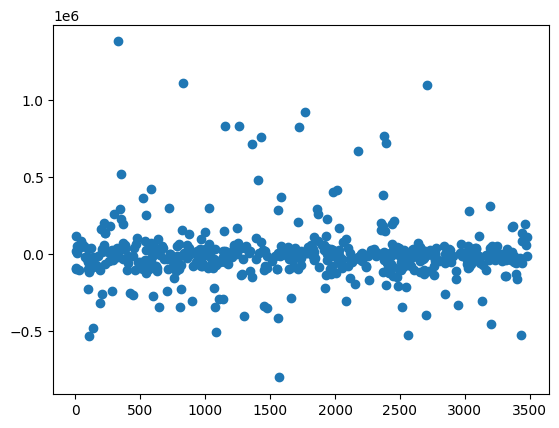

In [27]:
# plot the erroe
g= plt.plot((Y_test - y_pred), marker='o', linestyle='')

In [28]:
print("R2-score: %.2f" % r2_score(Y_test, y_pred ) )

R2-score: 0.52


# 

# PolynomialRegression model: degree = 3

In [29]:
poly_model = PolynomialFeatures(3)

# transform out polynomial features
poly_X_train = poly_model.fit_transform(X_train)
poly_X_test = poly_model.fit_transform(X_test)

#poly_X_train

## Prediction & R2_score

In [30]:
from sklearn.linear_model import LinearRegression

# fit the model

regression_model = LinearRegression()

regression_model.fit(poly_X_train, Y_train)

y_pred = regression_model.predict(poly_X_test)


#print('Coefficients:', regression_model.coef_)

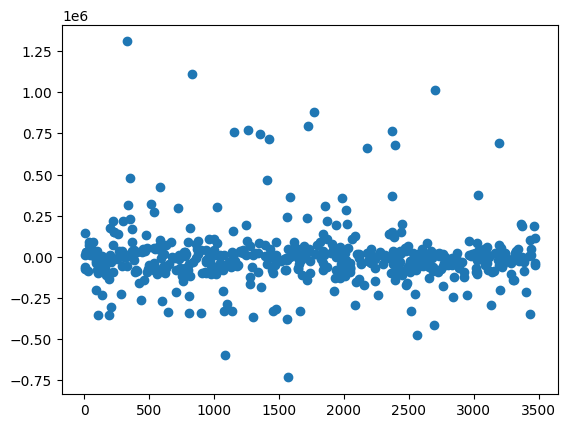

In [31]:
# plot the erroe
g= plt.plot((Y_test - y_pred), marker='o', linestyle='')

In [32]:
print("R2-score: %.2f" % r2_score(Y_test, y_pred ) )

R2-score: 0.56


# 

# :گزارش انجام پروژه
 ابتدا داده های پرت مساحت را از روش زد اسکور پیدا کردم که 4 داده پرت بدست آمد اما بعد تصمیم گرفتم با توجه به پیام هایی که در تالار گفتگو بود، داده های بزرگتر از 1000 را پیدا کنم و سطر مربوطه را حذف کنم که در این حالت 6 داده پرت پیدا شد. سپس سطرهایی که آدرس نداشتند را حذف کردم(به تعداد 23 سطر) و بعد نمودار هر پارامتر خانه را با توجه به قیمت رسم کردم که فقط از پارامترهایی که ارتباط معناداری با قیمت دارند برای مدل استفاده کنم(مساحت خانه به تنهایی با قیمت ارتباط مستقیمی نداشت پس از این پارامتر در مدل استفاده نکردم). در ادامه دیتاهای آسانسور و پارکینگ و انباری رو به 0 و 1 تبدیل کردم و بعد آدرس های یونیک ستون آدرس رو درآوردم(که به تعداد 192 آدرس یونیک وجود داشت) و بعد با روش وان هات  اینکودینگ و با فانکشن دامی ، هر آدرس یونیک رو تبدیل به ستون جدید کردم و دیتاهای آدرس را به صورت 0 و 1 ای درآوردم و بعد توی دیتا فریم جدیدی تمام این ستون هارو کانکت کردم و 4 ستون دیگر (آسانسور، پارکینگ، انباری و تعداد اتاق) رو هم به دیتا فریم جدید اضافه کردم و درنهایت دیتا فریم من دارای 196 ستون و 3450 سطر شد. در ادامه بعد از ست کردن داده های مستقل و وابسته در ماتریس، دیتاها رو به 2 دسته ی تست و ترین تقسیم کردم(داده های تست 15 درصد کل داده ها و ترین هم 85 درصد) و از روش رگرسیون خطی چندگانه استفاده کردم و داده هارو فیت کردم و میزان آر2 اسکور به عدد 0.37 رسید و تصمیم گرفتم برای بالاتر بردن دقت کارم از روش رگرسیون غیرخطی هم استفاده کنم که در این مرحله با رگرسیون غیرخطی از درجه2 به آر2 اسکور 0.53 رسیدم که خیلی بهتر از روش قبل شد. در ادامه رگرسیون با درجه 3 هم محاسبه کردم که دقت بالاتری داد و به آر2 اسکور 0.56 رسیدم 

# :نکته
در کد قبلی که فرستاده بودم گفتین کد یه سری ایرادات جزئی داشته مثل اینکه لیست ایندکس هارو چاپ کردم بعد کپی کردم تو کد بعدی.و گفتین بهتره همه چیز کدی باشه که من این مورد  رو هم در کد جدید اصلاح کردم و ممنون بابت راهنمایی تون. و برای درک بهتر میزان ارور، نمودار مقدار ارور رو هم رسم کردم که نشون میده چقدر ارور داره مدل

# 